In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\bluecom011\Desktop\module_2\data\transformed_winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


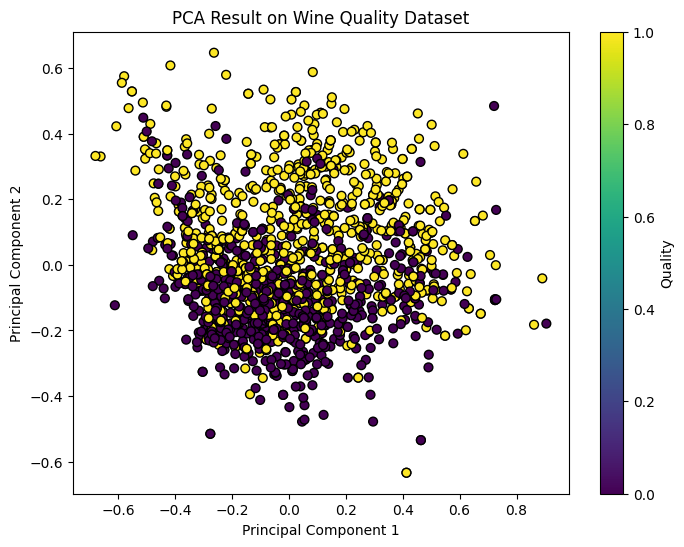

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


# PCA 모델 정의 (2차원으로 축소)
pca = PCA(n_components=2)

# 품질 열을 제외한 특성 데이터에 PCA 적용
X_pca = pca.fit_transform(df.drop('quality', axis=1))

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['quality'], cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality')
plt.title('PCA Result on Wine Quality Dataset')
plt.show()


In [4]:
X_pca.shape

(1599, 2)

In [6]:
import pickle
pathFolder = "./train/"
yTrainName = "wineyTrain1.pkl"
with open(pathFolder+yTrainName,'rb') as f2:
    y = pickle.load(f2)

In [8]:
y_np=y.to_numpy()
y_np

array([0, 0, 0, ..., 1, 0, 1])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import numpy as np

# 가상의 데이터 생성 (예시로 사용)
X = X_pca
y = y_np

# 데이터 차원 변환 (1599, 1, 2, 1) 형태로
X_reshaped = X.reshape((1599, 1, 2, 1))

# 모델 생성
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 2), activation='relu', input_shape=(1, 2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 1, 1, 32)          96        
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
# 예제 데이터 준비
X = X_pca
y = y_np

# 데이터 차원 변환
X_reshaped = X.reshape((1599, 1, 2, 1))  # CNN에 적합한 형태로 변환

# 모델 구성
model = Sequential([
    Conv2D(32, kernel_size=(1, 2), activation='relu', padding='same', input_shape=(1, 2, 1)),
    MaxPooling2D(pool_size=(1, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# ModelCheckpoint 설정
checkpoint_path = "best_model.h5"  # 모델을 저장할 파일 경로
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_best_only=True, 
                             monitor='val_accuracy', 
                             mode='max',
                             verbose=1)
# 모델 학습
history = model.fit(X_reshaped, y, epochs=1000, batch_size=16, validation_split=0.2)

Epoch 1/1000
80/80 [==============================] - 1s 6ms/step - loss: 0.6202 - accuracy: 0.6560 - val_loss: 0.6126 - val_accuracy: 0.6531
Epoch 2/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7099 - val_loss: 0.6424 - val_accuracy: 0.7094
Epoch 3/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7045 - val_loss: 0.6183 - val_accuracy: 0.7031
Epoch 4/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7107 - val_loss: 0.6148 - val_accuracy: 0.6406
Epoch 5/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7029 - val_loss: 0.6138 - val_accuracy: 0.6812
Epoch 6/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.6998 - val_loss: 0.6149 - val_accuracy: 0.6844
Epoch 7/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7084 - val_loss: 0.6087 - val_accuracy: 0.6844
Epoch 

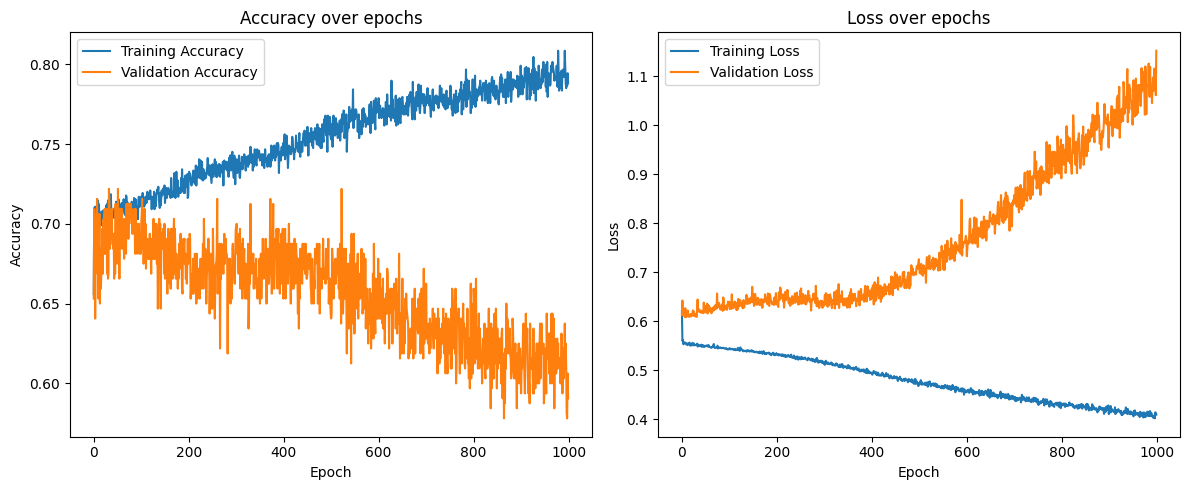

In [16]:


# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
